Cohort 25 - In Class Assignment

Source: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

In [1]:
#Importing relevant libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
#Import data from csv

data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
#Reading data head

data.head(100)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,26.0,1.70,70.0,yes,no,3.0,1.0,Frequently,no,2.0,no,2.0,0.0,Frequently,Public_Transportation,Normal_Weight
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


In [4]:
#Reading data shape

data.shape

(2111, 17)

In [5]:
#Understanding data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
#Importing libraries to convert objects to numeric values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
#Converting gender feature from string to float/int

data['Gender'] = le.fit_transform(data['Gender'])

In [8]:
#Converting family_history_with_overweigh feature from string to float/int

data['family_history_with_overweight'] = le.fit_transform(data['family_history_with_overweight'])

In [9]:
#Converting CAEC feature from string to float/int

data['CAEC'] = le.fit_transform(data['CAEC'])

In [10]:
#Converting SMOKE feature from string to float/int

data['SMOKE'] = le.fit_transform(data['SMOKE'])

In [11]:
#Converting SCC feature from string to float/int

data['SCC'] = le.fit_transform(data['SCC'])

In [12]:
#Converting MTRANS feature from string to float/int

data['MTRANS'] = le.fit_transform(data['MTRANS'])

In [13]:
#Converting NObeyesdad feature from string to float/int

data['NObeyesdad'] = le.fit_transform(data['NObeyesdad'])

In [14]:
#Converting CALC feature from string to float/int

data['CALC'] = le.fit_transform(data['CALC'])

In [15]:
#Converting feature from string to float/int

data['CAEC'] = le.fit_transform(data['CAEC'])

In [16]:
#Converting FAVC feature from string to float/int

data['FAVC'] = le.fit_transform(data['FAVC'])                            

In [17]:
#Identifying missing values

data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [18]:
#Dropping feature (Weight) as it may contribute to leakage

data = data.drop(['Weight'],axis=1)

In [19]:
#Re-reading data shape

data.shape

(2111, 16)

In [20]:
#Defining variables y equals independent variable column and x equals all other remaining predictor variables
X = data.loc[:, data.columns != 'NObeyesdad']
y = data.iloc[:, 0]

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#Using standard scaler to scales each feature/variable to unit variance.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [25]:
#Prediction variables
y_pred

array([1.06699828, 0.0634428 , 1.06699828, 0.0634428 , 0.0634428 ,
       1.06699828, 1.06699828, 0.0634428 , 0.0634428 , 1.06699828,
       0.0634428 , 0.0634428 , 0.0634428 , 1.06699828, 0.0634428 ,
       1.06699828, 1.06699828, 0.0634428 , 0.0634428 , 1.06699828,
       0.0634428 , 1.06699828, 1.06699828, 0.0634428 , 1.06699828,
       1.06699828, 0.0634428 , 1.06699828, 1.06699828, 1.06699828,
       1.06699828, 0.0634428 , 1.06699828, 0.0634428 , 1.06699828,
       0.0634428 , 1.06699828, 1.06699828, 0.0634428 , 0.0634428 ,
       0.0634428 , 1.06699828, 0.0634428 , 0.0634428 , 0.0634428 ,
       1.06699828, 1.06699828, 0.0634428 , 0.0634428 , 0.0634428 ,
       1.06699828, 1.06699828, 1.06699828, 0.0634428 , 1.06699828,
       1.06699828, 0.0634428 , 0.0634428 , 1.06699828, 0.0634428 ,
       1.06699828, 0.0634428 , 0.0634428 , 0.0634428 , 0.0634428 ,
       1.06699828, 1.06699828, 0.0634428 , 1.06699828, 0.0634428 ,
       0.0634428 , 0.0634428 , 1.06699828, 0.0634428 , 1.06699

In [26]:
#Generate model R2 score 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [27]:
score

0.98291275054752

In [28]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

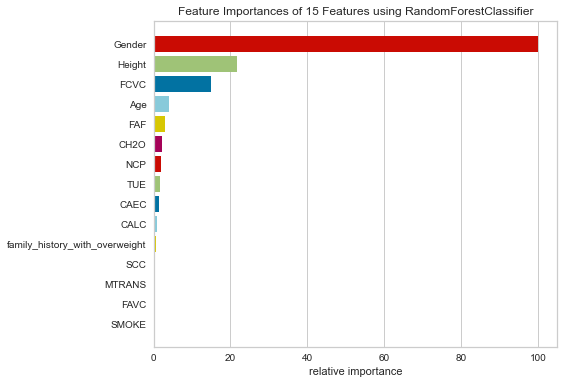

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [29]:
# Using Random Forest Classifier to identify feature importance

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [30]:
#Importing libaries to visualize data

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='NObeyesdad', ylabel='Gender'>

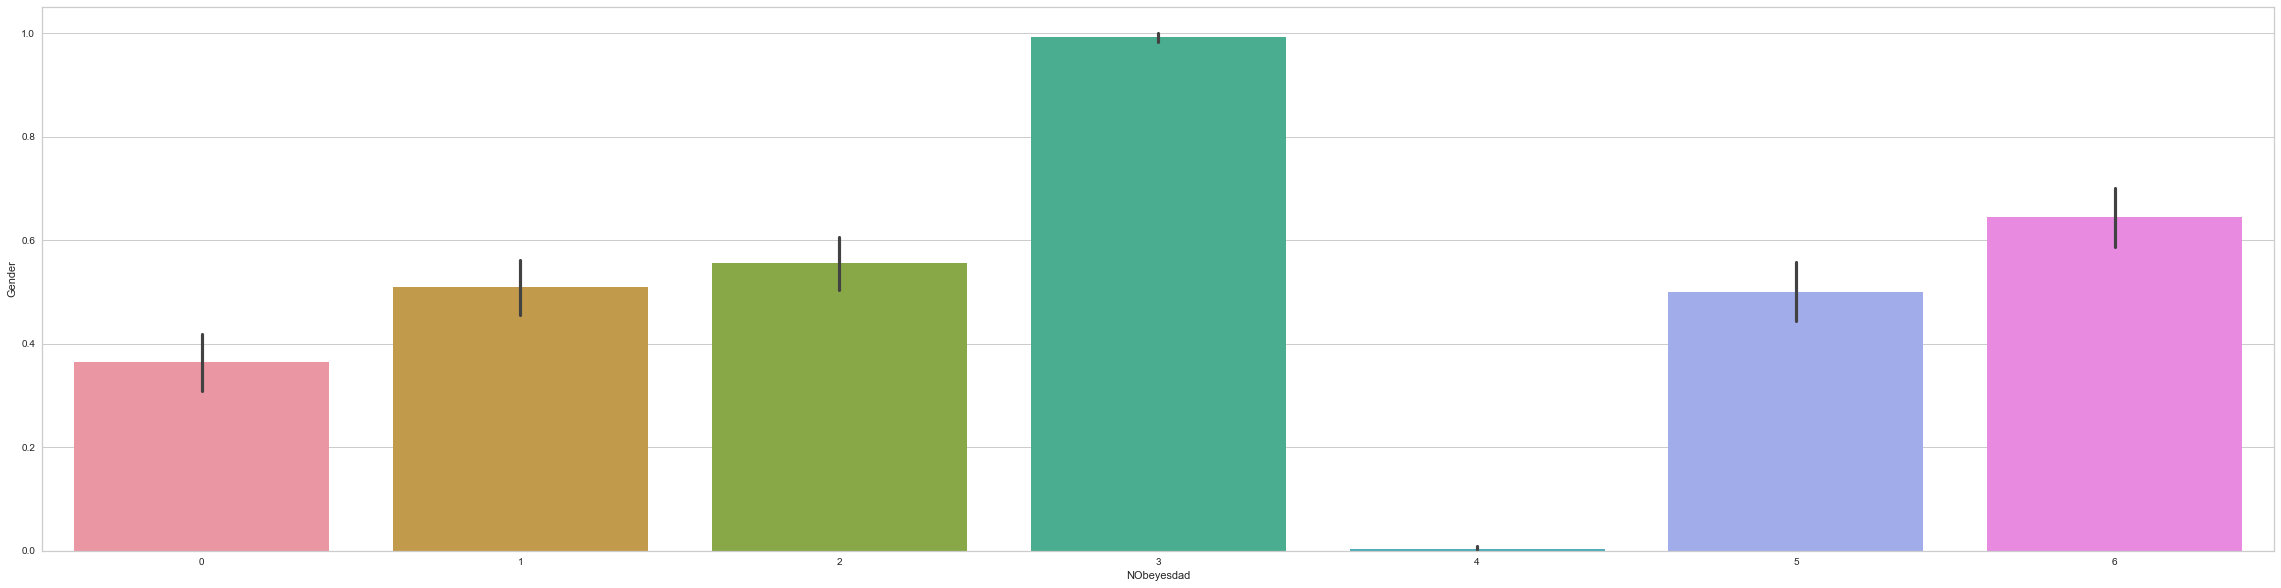

In [31]:
# Plotting data

plt.figure(figsize=(40,10))
sns.barplot(x = 'NObeyesdad', y = 'Gender', data = data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='NObeyesdad'>

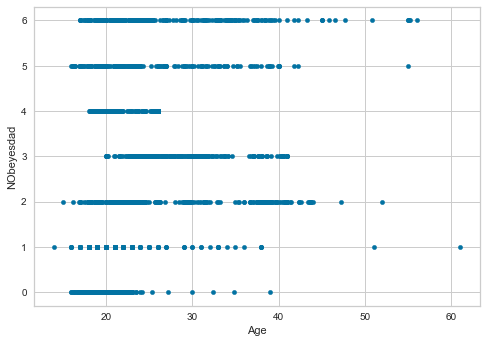

In [32]:
data.plot.scatter(x = 'Age', y = 'NObeyesdad')

In [33]:
data.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [34]:
ob=data.groupby('NObeyesdad')['Gender'].sum()

<AxesSubplot:xlabel='NObeyesdad', ylabel='Gender'>

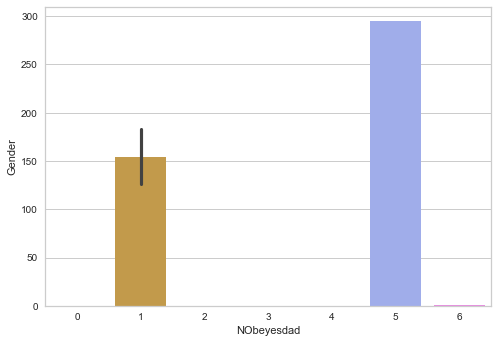

In [35]:
sns.barplot(x=data['NObeyesdad'], y=ob, data=data)